<a href="https://colab.research.google.com/github/Monisha-A-M/ASSAIGNMENT-1/blob/main/case_study6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# ***TO LOAD DATA INTO PYTHON ENVIORNMENT***

In [56]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ***TO MAKE PASSENGERS ID AS INDEX***

In [ ]:
data.rename(columns={'PassengerId':'index'},inplace=True)
data.head()

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ***CHECKING BASIC DETAILS OF DATASET***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     891 non-null    int64  
 1   Survived  891 non-null    int64  
 2   Pclass    891 non-null    int64  
 3   Name      891 non-null    object 
 4   Sex       891 non-null    object 
 5   Age       714 non-null    float64
 6   SibSp     891 non-null    int64  
 7   Parch     891 non-null    int64  
 8   Ticket    891 non-null    object 
 9   Fare      891 non-null    float64
 10  Cabin     204 non-null    object 
 11  Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


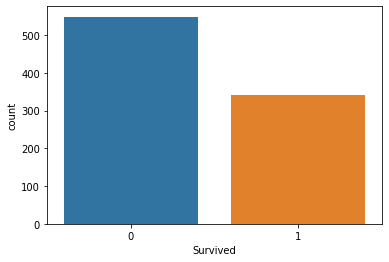

In [ ]:
sns.countplot(data['Survived'])

# ***FILLING THE MISSING VALUES IN COLUMNS***

In [ ]:
data.dtypes

index         int64
Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

since age of some crew is unknown we fill it with median\\

---


In [ ]:
data['Age']=data['Age'].fillna(data['Age'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# ***CHECKING OUTLIERS IN ATLEAST 3 COLUMNS***

Text(0.5, 1.0, 'box plot of age of passengers')

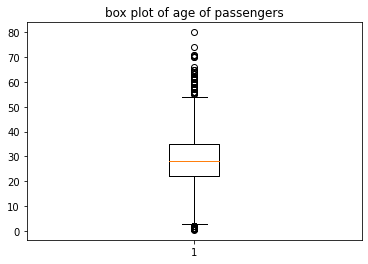

In [47]:
plt.boxplot(data['Age'])
plt.title('box plot of age of passengers')

Text(0.5, 1.0, 'box plot for fare given by passengers')

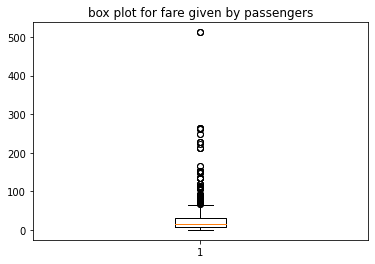

In [48]:
plt.boxplot(data['Fare'])
plt.title('box plot for fare given by passengers')

Text(0.5, 1.0, 'parch')

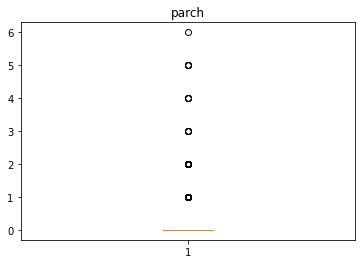

In [49]:
plt.boxplot(data['Parch'])
plt.title('parch')

very few elder people were in embarked in titanic and the luxuary suits were reserved for few at very high rate

# ***MIN MAX SCALING  ***

In [50]:
from sklearn import preprocessing

In [52]:
y=data['Survived']
x=data.drop('Survived',axis=1)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.2)
from sklearn import linear_model
ir=linear_model.LinearRegression()
model=ir.fit(X_train,Y_train)
predictions=model.predict(X_test)

ValueError: ignored

In [ ]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)